### https://dacon.io/competitions/open/235610/overview/description

# 데이터
index 구분자 <br>
quality 품질<br>
fixed acidity 산도<br>
volatile acidity 휘발성산<br>
citric acid 시트르산<br>
residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분<br>
chlorides 염화물<br>
free sulfur dioxide 독립 이산화황<br>
total sulfur dioxide 총 이산화황<br>
density 밀도<br>
pH 수소이온농도<br>
sulphates 황산염<br>
alcohol 도수<br>
type 종류


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [78]:
train.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [10]:
print('품질 최고 : {}'.format(train['quality'].max()))
print('품질 최저 : {}'.format(train['quality'].min()))
print('품질 평균 : {:.2f}'.format(train['quality'].mean()))

품질 최고 : 9
품질 최저 : 3
품질 평균 : 5.82


#### 산도(fixed acidity)에 따른 품질

In [19]:
print('산도 최고 : {}'.format(train['fixed acidity'].max()))
print('산도 최저 : {}'.format(train['fixed acidity'].min()))
print('산도 평균 : {:.2f}'.format(train['fixed acidity'].mean()))

산도 최고 : 15.9
산도 최저 : 3.8
산도 평균 : 7.21


In [27]:
train[['quality', 'fixed acidity']].groupby(['quality'], as_index=True).mean()

,fixed acidity
quality,
3,7.811538
4,7.269892
5,7.329195
6,7.166743
7,7.123972
8,6.839474
9,7.420000


In [41]:
train.groupby('quality').count()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
quality,,,,,,,,,,,,,
3,26,26,26,26,26,26,26,26,26,26,26,26,26
4,186,186,186,186,186,186,186,186,186,186,186,186,186
5,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788
6,2416,2416,2416,2416,2416,2416,2416,2416,2416,2416,2416,2416,2416
7,924,924,924,924,924,924,924,924,924,924,924,924,924
8,152,152,152,152,152,152,152,152,152,152,152,152,152
9,5,5,5,5,5,5,5,5,5,5,5,5,5


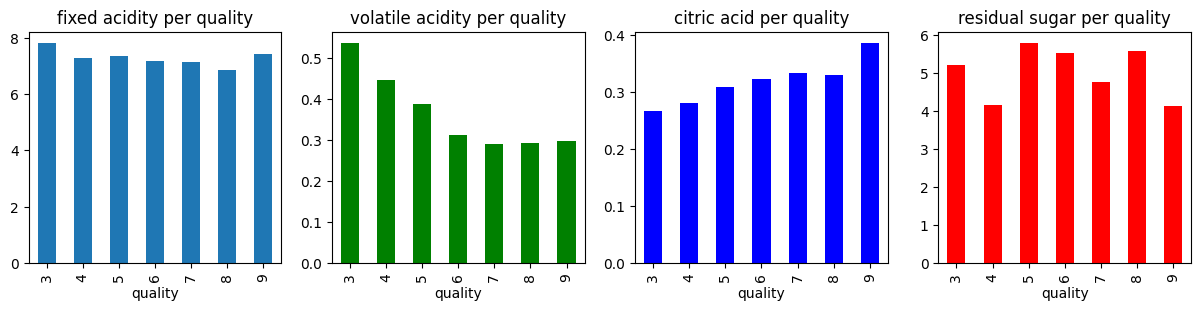

In [58]:
f, ax = plt.subplots(1,4,figsize=(15,3))

# 산도(fixed acidity)와 품질의 관계
train[['quality', 'fixed acidity']].groupby(['quality'], as_index=True).mean().plot.bar(ax = ax[0]) 
ax[0].set_title('fixed acidity per quality')
ax[0].legend().remove()
# => 산도가 높다거나 낮다고해서 품질의 값이 달라지지 않는다

# 휘발성산(volatile acidity)과 품질의 관계
train[['quality', 'volatile acidity']].groupby(['quality'], as_index=True).mean().plot.bar(ax=ax[1], color='green')
ax[1].set_title('volatile acidity per quality')
ax[1].legend().remove()
# => 휘발성산이 높으면 품질이 낮다는 것을 볼 수 있음

# 시트르산(citric acid)과 품질의 관계
train[['quality', 'citric acid']].groupby(['quality'], as_index=True).mean().plot.bar(ax=ax[2], color='blue')
ax[2].set_title('citric acid per quality')
ax[2].legend().remove()
# => 시트르산이 높으면 품질의 값도 높음

# 잔당(residual sugar)과 품질의 관계
train[['quality', 'residual sugar']].groupby(['quality'], as_index=True).mean().plot.bar(ax=ax[3], color='red')
ax[3].set_title('residual sugar per quality')
ax[3].legend().remove()
# => 잔당은 품질과 관련이 없다



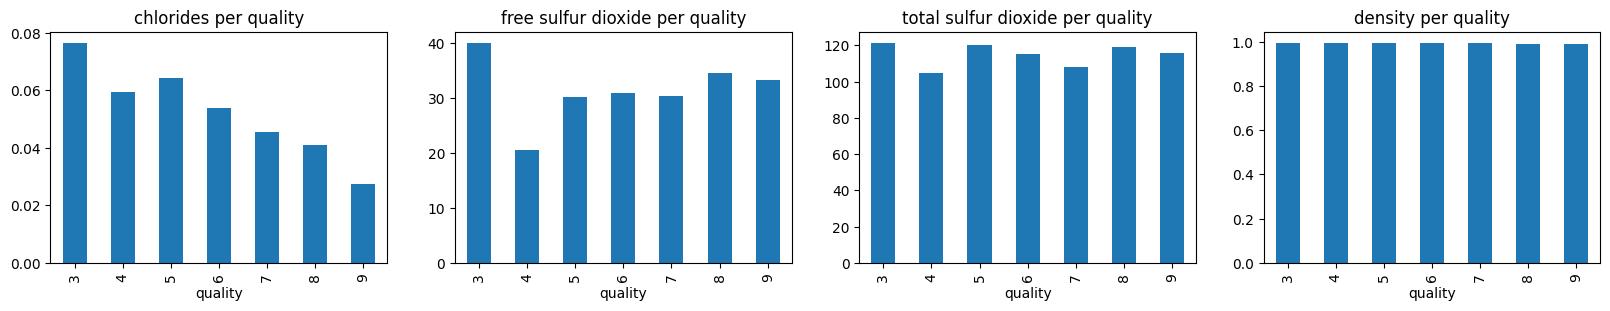

In [63]:
f, ax = plt.subplots(1,4, figsize=(20,3))
# 염화물(chlorides)과 품질의 관계
train[['quality', 'chlorides']].groupby('quality').mean().plot.bar(ax=ax[0])
ax[0].set_title('chlorides per quality')
ax[0].legend().remove()
# 염화물이 높을 수록 품질이 낮음

# 독립 이산화황(free sulfur dioxide)과 품질의 관계
train[['quality', 'free sulfur dioxide']].groupby('quality').mean().plot.bar(ax=ax[1])
ax[1].set_title('free sulfur dioxide per quality')
ax[1].legend().remove()
# 독립 이산화황이 높다고해서 낮다고해서 품질이 다르지 않다

# 총 이산화황(total sulfur dioxide)과 품질의 관계
train[['quality', 'total sulfur dioxide']].groupby('quality').mean().plot.bar(ax=ax[2])
ax[2].set_title('total sulfur dioxide per quality')
ax[2].legend().remove()
# 품질과 관계가 없다

# 밀도(density)와 품질의 관계
train[['quality', 'density']].groupby('quality').mean().plot.bar(ax=ax[3])
ax[3].set_title('density per quality')
ax[3].legend().remove()
# 품질과 관계가 없다

In [68]:
print('max: {}'.format(train['pH'].max()))
print('min: {}'.format(train['pH'].min()))
print('avg: {}'.format(train['pH'].mean()))

max: 4.01
min: 2.74
avg: 3.2195015462979804


<AxesSubplot:xlabel='quality', ylabel='count'>

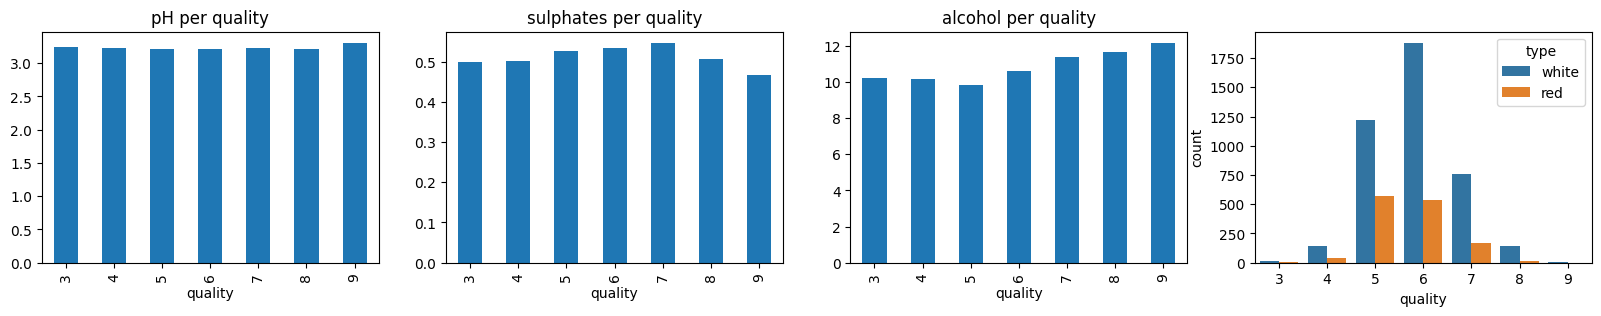

In [82]:
f, ax = plt.subplots(1,4, figsize=(20,3))
# 수소이온농도(pH)와 품질의 관계
train[['quality', 'pH']].groupby('quality').mean().plot.bar(ax=ax[0])
ax[0].set_title('pH per quality')
ax[0].legend().remove()
# 품질과 관련 X

# 황산염(sulphates)과 품질의 관계
train[['quality', 'sulphates']].groupby('quality').mean().plot.bar(ax=ax[1])
ax[1].set_title('sulphates per quality')
ax[1].legend().remove()
# 품질과 관련 X

# 도수(alcohol)와 품질의 관계
train[['quality', 'alcohol']].groupby('quality').mean().plot.bar(ax=ax[2])
ax[2].set_title('alcohol per quality')
ax[2].legend().remove()
# 도수가 높을 수록 품질이 높다

# 종류(type)와 품질의 관계
sns.countplot(data=train, x = "quality", hue="type")
# 종류와는 품질과는 관계가 없다


# 데이터
index 구분자 <br> 
quality 품질<br>
fixed acidity 산도 => X<br>
volatile acidity 휘발성산 => O<br>
citric acid 시트르산 => O<br>
residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분 => X<br>
chlorides 염화물 => O<br>
free sulfur dioxide 독립 이산화황 => X<br>
total sulfur dioxide 총 이산화황 => X<br>
density 밀도 => X<br>
pH 수소이온농도 => X<br>
sulphates 황산염 => X<br>
alcohol 도수 => O<br>
type 종류 => X


In [ ]:
test

In [89]:
train = train.drop(columns='index')
#train = train.drop(columns='quality')

In [90]:
test = test.drop(columns='index')
#test = test.drop(columns='quality')

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5497 non-null   float64
 1   volatile acidity      5497 non-null   float64
 2   citric acid           5497 non-null   float64
 3   residual sugar        5497 non-null   float64
 4   chlorides             5497 non-null   float64
 5   free sulfur dioxide   5497 non-null   float64
 6   total sulfur dioxide  5497 non-null   float64
 7   density               5497 non-null   float64
 8   pH                    5497 non-null   float64
 9   sulphates             5497 non-null   float64
 10  alcohol               5497 non-null   float64
 11  type                  5497 non-null   object 
dtypes: float64(11), object(1)
memory usage: 515.5+ KB


In [91]:
train = train.drop(columns='fixed acidity')
train = train.drop(columns='residual sugar')
train = train.drop(columns='free sulfur dioxide')
train = train.drop(columns='total sulfur dioxide')
train = train.drop(columns='density')
train = train.drop(columns='pH')
train = train.drop(columns='sulphates')
train = train.drop(columns='type')

In [92]:
test = test.drop(columns='fixed acidity')
test = test.drop(columns='residual sugar')
test = test.drop(columns='free sulfur dioxide')
test = test.drop(columns='total sulfur dioxide')
test = test.drop(columns='density')
test = test.drop(columns='pH')
test = test.drop(columns='sulphates')
test = test.drop(columns='type')

In [93]:
from sklearn.ensemble import RandomForestRegressor

train_x = train.drop('quality',axis = 1)
train_y = train['quality']


model = RandomForestRegressor()
model.fit(train_x,train_y)

RandomForestRegressor()

In [94]:
pred = model.predict(test)

In [100]:
submission = pd.read_csv('data/sample_submission.csv')

In [113]:
submission['quality'] = pred

In [109]:
pred = [int(i) for i in pred]

In [110]:
pred

[5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 6,
 5,
 4,
 4,
 5,
 4,
 5,
 7,
 5,
 4,
 5,
 5,
 6,
 5,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 5,
 6,
 5,
 5,
 6,
 5,
 6,
 5,
 4,
 6,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 4,
 5,
 6,
 5,
 5,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 5,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 7,
 5,
 6,
 6,
 5,
 5,
 5,
 6,
 5,
 6,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 6,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 6,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 7,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 5,
 6,
 5,
 6,


In [111]:
submission.to_csv('mysubmission.csv', index=False)

In [114]:
submission

,index,quality
0,0,5
1,1,5
2,2,5
3,3,5
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,5
